In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from math import sqrt

In [2]:
def errors(u, v):
    assert len(u)==len(v), "Размеры массивов не совпадают!"
    e_max = 0
    sum_rms = 0
    N = len(u)
    for j in range(N):
        delta = u[j] - v[j]
        if e_max < abs(delta):
            e_max = abs(delta)
            
        sum_rms += delta**2
        
    e_rms = sqrt(sum_rms/N)
    
    print("Максимальная погрешность: ", e_max)
    print("Среднеквадратичная погрешность: ", e_rms)

In [34]:
def smoothing(f):
    q = 0.1
    
    g = f.copy()
    
    for i in range(2, len(f)-2):
        Dmm = f[i-1]-f[i-2]
        Dm = f[i]-f[i-1]
        Dp = f[i+1]-f[i]
        Dpp = f[i+2]-f[i+1]
        
        if (Dpp*Dp < 0) or (Dp*Dm < 0):
            Qp = Dp
        else:
            Qp = 0
            
        if (Dm*Dmm < 0) or (Dp*Dm < 0):
            Qn = Dm
        else:
            Qn = 0
            
        g[i] = f[i] + q*(Qp - Qn)
        
    return g

# Линейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + a\frac{\partial f}{\partial x} = 0, a > 0 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [49]:
a = 1    # > 0
f1 = 10

dx = 0.005
dt = 0.003

N = 500
T = 900

In [50]:
def getPrecise(t):
    res = np.zeros(N)
    max_i = int(a*t/dx)+1
    if max_i > N:
        max_i = N
    for i in range(max_i):
        res[i] = f1
        
    return res

In [51]:
sigma = a*dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  0.6


### Схема Лакса

Момент времени  0.675
Максимальная погрешность:  4.909781312497552
Среднеквадратичная погрешность:  0.7472388817521592
Момент времени  1.35
Максимальная погрешность:  4.936755790089582
Среднеквадратичная погрешность:  0.8896133946542457
Момент времени  2.025
Максимальная погрешность:  4.948512183810664
Среднеквадратичная погрешность:  0.9848862071084256


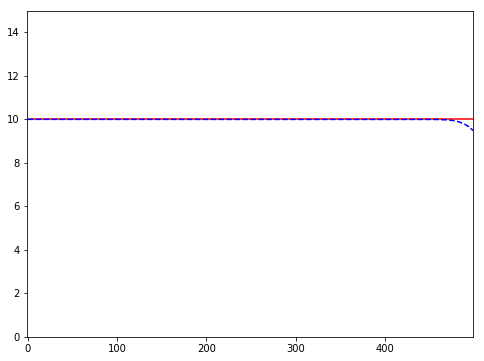

In [67]:
lin_lax = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lax[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lax[n][i-1]
        B = lin_lax[n][i+1]
        lin_lax[n+1][i] = (B+A)/2 - sigma/2 * (B-A)
    lin_lax[n+1][N-1] = lin_lax[n][N-2]
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(lin_lax[n], getPrecise(n*dt))
        

fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'b', linestyle = '--')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = lin_lax[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

### Схема Лакса - Вендроффа (без cглаживания)

Момент времени  0.675
Максимальная погрешность:  6.140118378328753
Среднеквадратичная погрешность:  0.4720513646633556
Момент времени  1.35
Максимальная погрешность:  6.260318115640951
Среднеквадратичная погрешность:  0.5385267984815005
Момент времени  2.025
Максимальная погрешность:  6.316628204133105
Среднеквадратичная погрешность:  0.5812579091472405


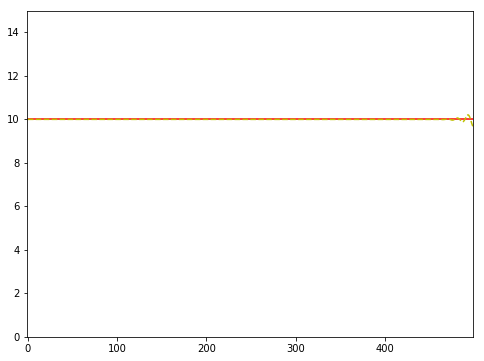

In [68]:
lin_lw = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lw[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lw[n][i-1]
        E = lin_lw[n][i]
        B = lin_lw[n][i+1]
        
        fp = (B + E - sigma*(B - E))/2
        fn = (E + A - sigma*(E - A))/2
        
        lin_lw[n+1][i] = lin_lw[n][i] - sigma*(fp-fn)
    lin_lw[n+1][N-1] = lin_lw[n][N-2]
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(lin_lw[n], getPrecise(n*dt))


fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'y', linestyle = '--')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = lin_lw[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

### Схема Лакса - Вендроффа (со cглаживанием)

Момент времени  0.675
Максимальная погрешность:  6.140118378328753
Среднеквадратичная погрешность:  0.4720513646633556
Момент времени  1.35
Максимальная погрешность:  6.260318115640951
Среднеквадратичная погрешность:  0.5385267984815005
Момент времени  2.025
Максимальная погрешность:  6.316628204133105
Среднеквадратичная погрешность:  0.5812579091472405


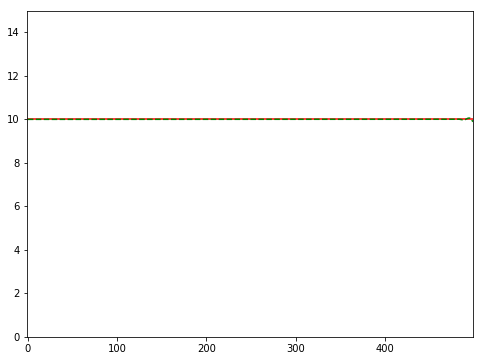

In [69]:
lin_lw_s = np.zeros((T,N))

for n in range(-1, T-1):
    lin_lw_s[n+1][0] = f1
    for i in range(1, N-1):
        A = lin_lw_s[n][i-1]
        E = lin_lw_s[n][i]
        B = lin_lw_s[n][i+1]
        
        fp = (B + E - sigma*(B - E))/2
        fn = (E + A - sigma*(E - A))/2
        
        lin_lw_s[n+1][i] = lin_lw_s[n][i] - sigma*(fp-fn)
    lin_lw_s[n+1][N-1] = lin_lw_s[n][N-2]
    
    lin_lw_s[n+1] = smoothing(lin_lw_s[n+1])
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(lin_lw[n], getPrecise(n*dt))


fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'g', linestyle = '--')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = lin_lw_s[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

### Сравнение

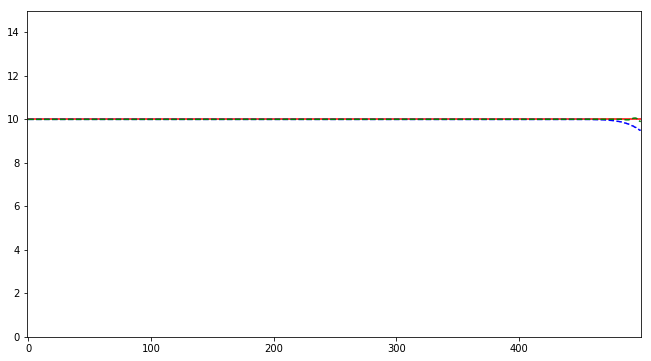

In [71]:
fig, ax = plt.subplots(figsize = (11, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'b', linestyle = '--')
ln3, = plt.plot([], [], color = 'g', linestyle = '--')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = getPrecise(frame_const*t*dt)
    ln.set_data(xdata, ydata)
    ydata2 = lin_lax[frame_const*t]
    ln2.set_data(xdata, ydata2)
    ydata3 = lin_lw_s[frame_const*t]
    ln3.set_data(xdata, ydata3)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, init_func=init, interval=20, blit=True)
HTML(anim.to_html5_video())

# Нелинейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + \frac{\partial F}{\partial x} = 0, F = f^2/2 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [88]:
f1 = 0.8

dx = 0.01
dt = 0.01

N = 300
T = 1000

In [89]:
sigma = dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  1.0


### Схема Лакса
$$
f_i^{n+1} = \frac{1}{2}(f_{i+1}+f_{i-1}) - \frac{\sigma}{2}(F_{i+1}-F_{i-1}), \sigma = \frac{\Delta t}{\Delta x}
$$


Схема устойчива при $\sigma \cdot max |f| < 1$

sigma * max |f| =  0.8
Устойчиво

Момент времени  2.5
Максимальная погрешность:  0.8
Среднеквадратичная погрешность:  0.460469048392669
Момент времени  5.0
Максимальная погрешность:  0.8
Среднеквадратичная погрешность:  0.6522001823527445
Момент времени  7.5
Максимальная погрешность:  0.035204234547883684
Среднеквадратичная погрешность:  0.002209760670333606


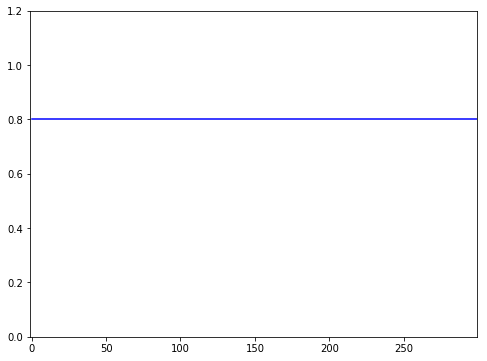

In [94]:
f = np.zeros((T,N))

for n in range(-1, T-1):
    f[n+1][0] = f1
    for i in range(1, N-1):
        a = f[n][i-1]
        b = f[n][i+1]
        A = f[n][i-1]**2/2
        B = f[n][i+1]**2/2
        f[n+1][i] = (b+a)/2 - sigma/2 * (B-A)
    f[n+1][N-1] = f[n][N-2]
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(f[n], getPrecise(n*dt))
        
    if n == 0:
        print("sigma * max |f| = ", sigma*max(f[0]))
        if sigma*max(f[0])<1:
            print("Устойчиво\n")
        else:
            print("Неустойчиво\n")


fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
# ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'b', linestyle = '-')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata2 = f[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, interval=20, init_func=init, blit=True)
HTML(anim.to_html5_video())

### Схема Лакса - Вендроффа
$$
f_{+}  = \frac{f_{i+1}+f_{i}}{2}, f_{-}  = \frac{f_{i}+f_{i-1}}{2}
$$

$$
f_i^{n+1} = f_i - \sigma \frac{F_{i+1} - F_{i-1}}{2} + \frac{\sigma^2}{2} [f_{+}(F_{i+1}-F_{i})-f_{-}(F_{i}-F_{i-1})], \sigma = \frac{\Delta t}{\Delta x}
$$


$$
\text{+ сглаживание}
$$

In [91]:
f2 = np.zeros((T,N))

for n in range(-1, T-1):
    f2[n+1][0] = f1
    for i in range(1, N-1):
        a = f2[n][i-1]
        e = f2[n][i]
        b = f2[n][i+1]
        A = f2[n][i-1]**2/2
        E = f2[n][i]**2/2
        B = f2[n][i+1]**2/2
        
        fp = (b+e)/2
        fn = (e+a)/2
        
        f2[n+1][i] = f2[n][i] - sigma*(B-A)/2+sigma**2/2*(fp*(B-E)-fn*(E-A))
    f2[n+1][N-1] = f2[n][N-2]
    f2[n+1] = smoothing(f2[n+1])
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(f[n], getPrecise(n*dt))

Момент времени  2.5
Максимальная погрешность:  0.8
Среднеквадратичная погрешность:  0.460469048392669
Момент времени  5.0
Максимальная погрешность:  0.8
Среднеквадратичная погрешность:  0.6522001823527445
Момент времени  7.5
Максимальная погрешность:  0.035204234547883684
Среднеквадратичная погрешность:  0.002209760670333606


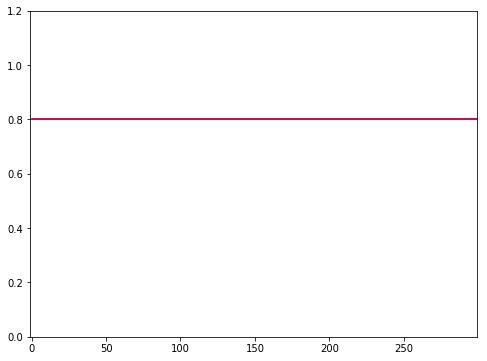

In [97]:
fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'b', linestyle = '-')
ln2, = plt.plot([], [], color = 'r', linestyle = '-')

frame_const = 5

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata = f[frame_const*t]
    ln.set_data(xdata, ydata)
    ydata2 = f2[frame_const*t]
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=T//frame_const, interval=50, init_func=init, blit=True)
HTML(anim.to_html5_video())